<a href="https://www.kaggle.com/code/sunnatillo91/airline-customer-satisfaction?scriptVersionId=188054571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


# 1. Understanding the process (download the data)

In [2]:
# download train_set
train_set = pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv", index_col=0)
train_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


# 2. Learning process of dataset

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [4]:
train_set.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [5]:
train_set['satisfaction'].value_counts()/len(train_set)*100

satisfaction
0    50.0
1    50.0
Name: count, dtype: float64

In [6]:
train_set.nunique()

Gender                                  2
Customer Type                           2
Age                                    74
Type of Travel                          2
Class                                   3
Flight Distance                      2421
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        5
Cleanliness                             6
Departure Delay in Minutes            239
Arrival Delay in Minutes              242
satisfaction                            2
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


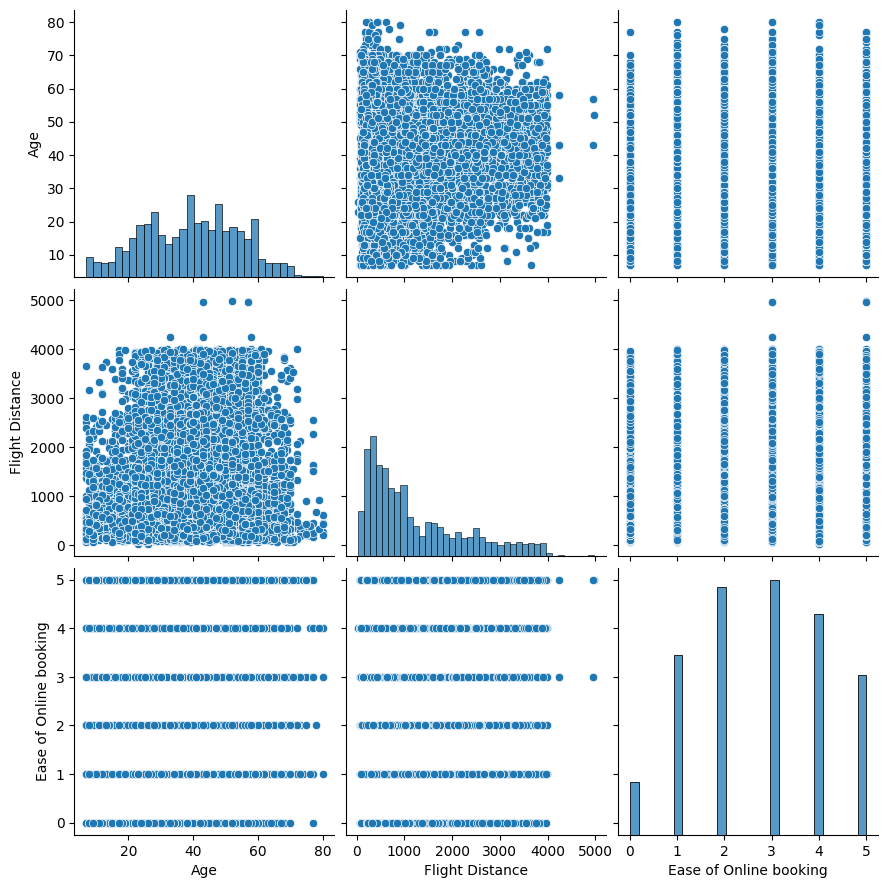

In [7]:
cols = ['Age','Flight Distance','Ease of Online booking']
sns.pairplot(train_set[cols], height=3)
plt.show()

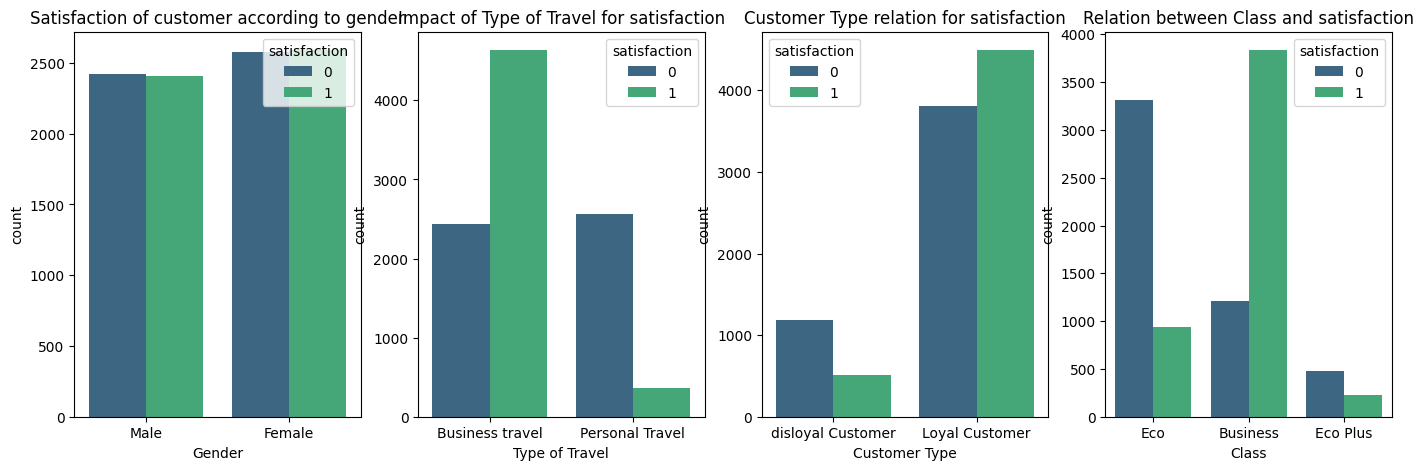

In [8]:
fig, axes = plt.subplots(1,4, figsize=(17,5))
df = train_set

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Satisfaction of customer according to gender")

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Impact of Type of Travel for satisfaction")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Customer Type relation for satisfaction")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[3])
axes[3].set_title("Relation between Class and satisfaction")

plt.show()

# 3. Data preparing for ML

In [9]:
# Step 1: Filter the DataFrame to keep only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Step 2: Calculate the correlation of each numeric column with the 'Churn' column
correlation_with_satisfaction = numeric_df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

# Display the correlations
print(correlation_with_satisfaction)
#Ma'lumotlarga ishlov berish
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64
Mavjud bo'lmagan qiymatlar soni: 28
Mavjud bo'lmagan qatorlar soni: 28
Mavjud bo'lmagan qatorlar %: 0.0%


In [10]:
df.dropna(inplace=True)

In [11]:
# Korrelyatsiya yuqori qiymatlarni ajratib olamiz
data = df.drop(['Gate location'], axis=1)
print(data.shape)
data.head()

(9972, 22)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,3,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,2,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,4,...,4,5,2,5,3,5,4,0,10.0,0


In [12]:
# Matnli ustunlarni songa o'tkazamiz
encoded = pd.get_dummies(data)
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,2,4,4,3,...,0,False,True,False,True,True,False,False,True,False
2,49,1431,4,1,4,3,5,4,5,5,...,1,True,False,True,False,True,False,True,False,False
3,43,867,1,4,4,4,4,3,1,1,...,0,True,False,True,False,True,False,False,True,False
4,27,1550,3,3,3,2,2,2,2,4,...,1,True,False,True,False,True,False,True,False,False
5,11,526,3,4,3,4,3,4,4,5,...,0,False,True,True,False,False,True,False,True,False


In [13]:
X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [15]:
y_test.shape

(2493,)

# 4. Modelling

# Logistic Regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1247
           1       0.89      0.86      0.87      1246

    accuracy                           0.87      2493
   macro avg       0.87      0.87      0.87      2493
weighted avg       0.87      0.87      0.87      2493

Model aniqligi: 0.8744484556758925


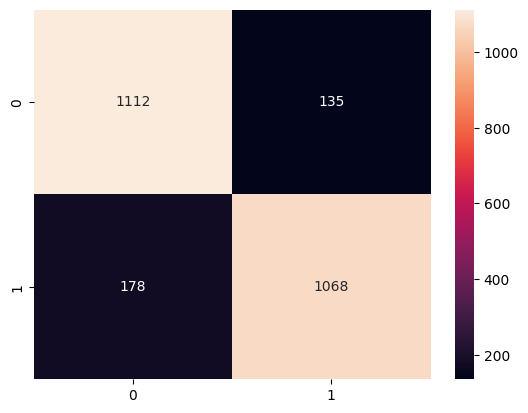

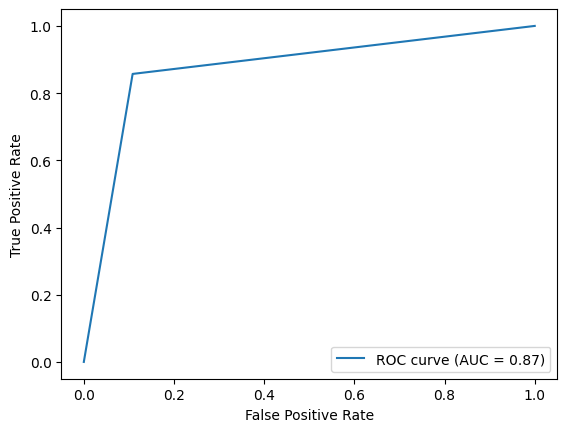

In [16]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Support Vector Machines

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1247
           1       0.94      0.90      0.92      1246

    accuracy                           0.92      2493
   macro avg       0.92      0.92      0.92      2493
weighted avg       0.92      0.92      0.92      2493

Model aniqligi: 0.9201764941837144


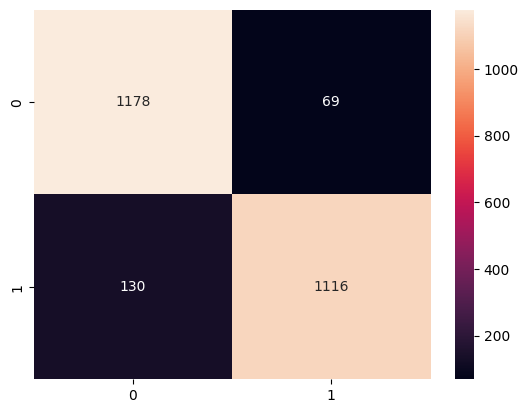

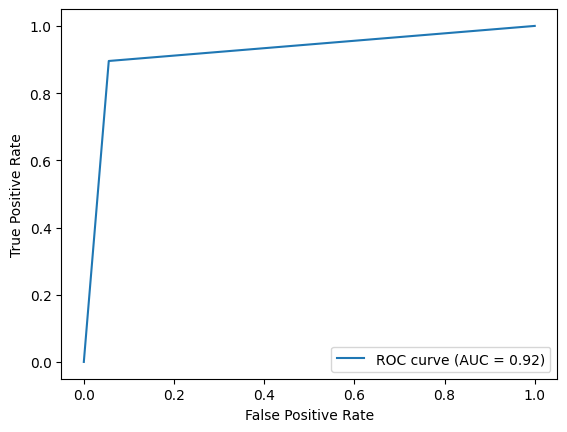

In [17]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1247
           1       0.92      0.94      0.93      1246

    accuracy                           0.93      2493
   macro avg       0.93      0.93      0.93      2493
weighted avg       0.93      0.93      0.93      2493

Model aniqligi: 0.9322101885278781


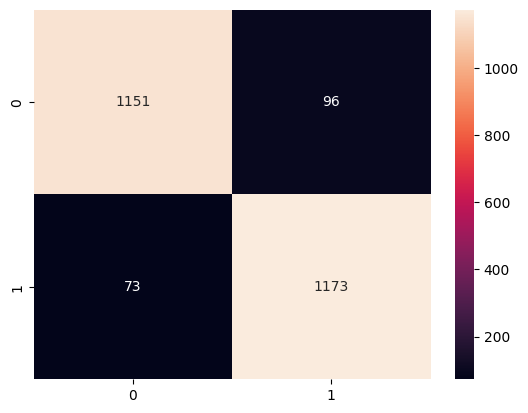

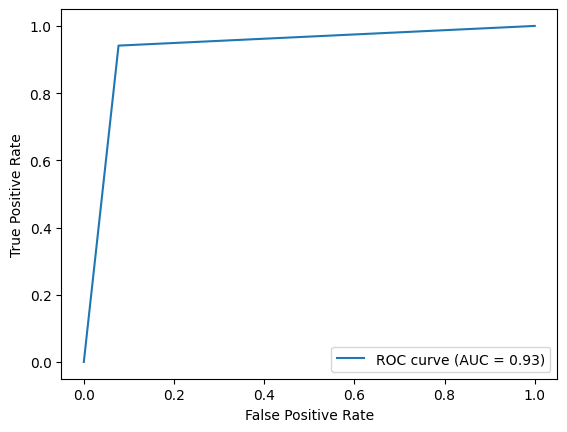

In [18]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1247
           1       0.95      0.95      0.95      1246

    accuracy                           0.95      2493
   macro avg       0.95      0.95      0.95      2493
weighted avg       0.95      0.95      0.95      2493

Model aniqligi: 0.9466506217408744


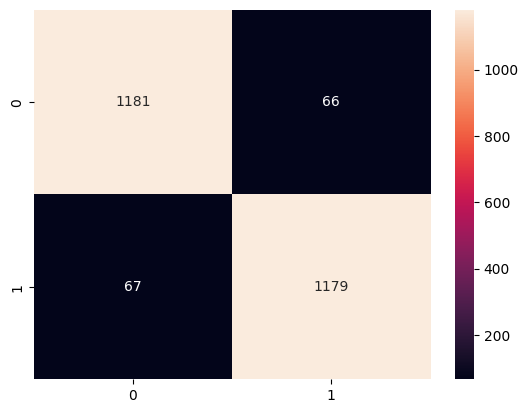

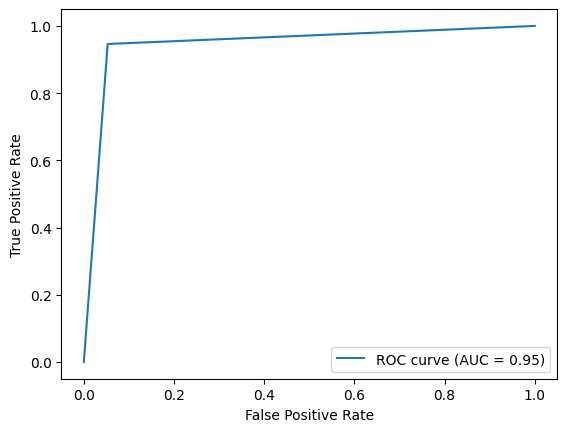

In [19]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# XGBClassifier

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1247
           1       0.96      0.95      0.96      1246

    accuracy                           0.96      2493
   macro avg       0.96      0.96      0.96      2493
weighted avg       0.96      0.96      0.96      2493

Model aniqligi: 0.9570798235058163


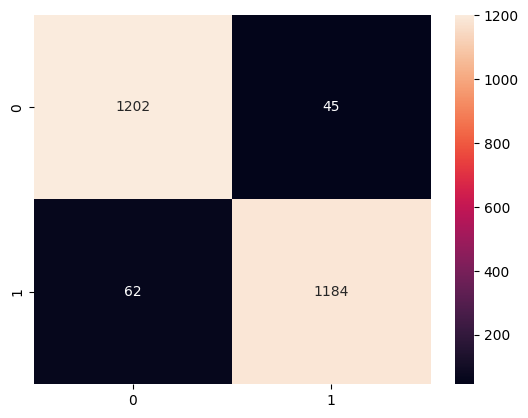

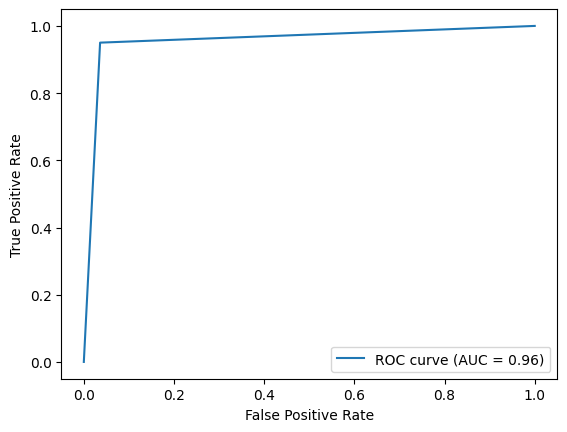

In [20]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Save the best model XGBClassifier

In [21]:
import pickle

filename = 'xgb_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

In [22]:
# load the model
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Working with test set

In [23]:
# download test_set
test_set = pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv")
test_set.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [24]:
# Step 1: Filter the DataFrame to keep only numeric columns
numeric_df_test = test_set.select_dtypes(include=[float, int])

#Ma'lumotlarga ishlov berish
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {test_set.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = test_set[test_set.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(test_set)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 19
Mavjud bo'lmagan qatorlar soni: 19
Mavjud bo'lmagan qatorlar %: 0.0%


## Giving median values to NaN

In [25]:
test_set['Arrival Delay in Minutes'] = test_set['Arrival Delay in Minutes'].fillna(test_set['Arrival Delay in Minutes'].median())

In [26]:
# mavjud bo'lmagan qatorlar soni
missing_rows = test_set[test_set.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")

Mavjud bo'lmagan qatorlar soni: 0


In [27]:
test_data = test_set.copy()
print(test_data.shape)
test_data.head()

(4000, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [28]:
# Drop not good correlation column
test_data = test_data.drop(['id','Gate location'], axis=1)

In [29]:
# change str to number
encoded = pd.get_dummies(test_data)
encoded

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,25,2704,2,2,2,2,3,5,2,4,...,191.0,True,False,True,False,False,True,False,True,False
1,49,1623,1,1,1,3,4,4,2,2,...,52.0,True,False,True,False,True,False,True,False,False
2,51,338,4,4,4,2,5,5,5,5,...,0.0,False,True,True,False,True,False,True,False,False
3,34,95,0,0,0,5,0,1,5,4,...,0.0,False,True,True,False,True,False,False,False,True
4,34,602,4,4,4,4,5,5,5,4,...,140.0,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,26,2949,3,3,4,4,4,4,4,1,...,36.0,False,True,True,False,True,False,True,False,False
3996,23,268,1,3,0,2,0,2,2,3,...,0.0,True,False,True,False,False,True,False,True,False
3997,38,602,2,1,1,2,2,2,2,1,...,45.0,False,True,True,False,True,False,False,True,False
3998,23,978,5,2,2,5,4,4,5,1,...,0.0,False,True,True,False,True,False,False,True,False


In [30]:
# number cols
num_part = test_data.select_dtypes(include=[float, int]).columns
num_part

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [31]:
test_set['Arrival Delay in Minutes'] = test_set['Arrival Delay in Minutes'].fillna(0)

In [32]:
test_data[num_part] = scaler.fit_transform(test_data[num_part])

# One-hot encoding
encoded = pd.get_dummies(test_data)
encoded

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.246575,0.536412,0.4,0.4,0.4,0.4,0.6,1.00,0.25,0.75,...,0.310569,True,False,True,False,False,True,False,True,False
1,0.575342,0.316517,0.2,0.2,0.2,0.6,0.8,0.75,0.25,0.25,...,0.084553,True,False,True,False,True,False,True,False,False
2,0.602740,0.055126,0.8,0.8,0.8,0.4,1.0,1.00,1.00,1.00,...,0.000000,False,True,True,False,True,False,True,False,False
3,0.369863,0.005696,0.0,0.0,0.0,1.0,0.0,0.00,1.00,0.75,...,0.000000,False,True,True,False,True,False,False,False,True
4,0.369863,0.108828,0.8,0.8,0.8,0.8,1.0,1.00,1.00,0.75,...,0.227642,False,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.260274,0.586249,0.6,0.6,0.8,0.8,0.8,0.75,0.75,0.00,...,0.058537,False,True,True,False,True,False,True,False,False
3996,0.219178,0.040887,0.2,0.6,0.0,0.4,0.0,0.25,0.25,0.50,...,0.000000,True,False,True,False,False,True,False,True,False
3997,0.424658,0.108828,0.4,0.2,0.2,0.4,0.4,0.25,0.25,0.00,...,0.073171,False,True,True,False,True,False,False,True,False
3998,0.219178,0.185313,1.0,0.4,0.4,1.0,0.8,0.75,1.00,0.00,...,0.000000,False,True,True,False,True,False,False,True,False


In [33]:
sample_sub = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv", index_col=0)
sample_sub.head()

,satisfaction
id,
1,0
2,0
3,0
4,0
5,0


# 5. Preparing output file

In [34]:
y_predict = model.predict(encoded)

# Step 7: Prepare the submission file
sample_sub['satisfaction'] = y_predict
sample_sub.to_csv("submission.csv")

sample_sub

,satisfaction
id,
1,0
2,0
3,1
4,1
5,0
...,...
3996,0
3997,0
3998,0


In [35]:
sample_sub.describe()

,satisfaction
count,4000.000000
mean,0.478250
std,0.499589
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
